## CorEx (Correlation Explanation)
[原博文链接](https://colab.research.google.com/github/VindhyaSRajan/Master-s-Thesis/blob/master/CorEx_Amazon.ipynb#scrollTo=cYbA1tRqOzU7)
<br>CorEx 模型是一种通过关联解释（Correlation Explanation, CorEx）进行主题建模的方法，是一种学习文档中潜在主题的信息理论方法。CorEx 不同于LDA，它不假设潜在的生成模型，而是通过信息理论框架最大程度地学习信息主题。
<br>2017 年 Gallagher 等提出加入少许先验知识的分层主题模型 CorEx，不同于主流的概率生成主题模型，CorEx 通过关联解释（Correlation Explanation）进行主题建模可产生丰富的主题，这些主题可以最大限度地提供一组文本数据的信息。CorEx 模型以轻量级的无监督式主题模型为基础，可扩展为分层主题建模与半监督式主题模型，支持通过锚定词（自由设置先验主题关键词）来集成领域知识，支持细粒度的主题分析

In [2]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline


### 数据准备

In [3]:
name = 'T-P'
data_1 = 'data/迪士尼主题2021/X_'+name+'.txt'  # 已预处理后的中文分词文本样本

corpus = []
for line in open(data_1, 'r',encoding='utf-8').readlines():
        #print line
    corpus.append(line.strip())
    #print corpus

    #将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(max_features=20000,binary=True)
X = vectorizer.fit_transform(corpus)
#X.toarray()
X = ss.csr_matrix(X)   
print(X.shape)

(16722, 17812)


In [4]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))
#print (words)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###  CorEx Topic Model

The main parameters of the CorEx topic model are:
+ **`n_hidden`**: number of topics ("hidden" as in "hidden latent topics")
+ **`words`**: words that label the columns of the doc-word matrix (optional)
+ **`docs`**: document labels that label the rows of the doc-word matrix (optional)
+ **`max_iter`**: number of iterations to run through the update equations (optional, defaults to 200)
+ **`verbose`**:  if `verbose=1`, then CorEx will print the topic TCs with each iteration
+ **`seed`**:     random number seed to use for model initialization (optional)

We'll train a topic model with 50 topics. (This will take a few minutes.)

In [5]:
# 模型训练
# Train the CorEx topic model with 50 topics
topic_model = ct.Corex(n_hidden=20, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(X, words=words)

### CorEx Output

Topic:
The CorEx topic model provides functionality for easily accessing the topics. Let's take a look one of the topics.

In [6]:
# Print a single topic from CorEx topic model
topic_model.get_topics(topic=1, n_words=20) # 第N个主题，前N个词

[('排队', 0.28677193823271624),
 ('项目', 0.1840264347958498),
 ('小时', 0.1777228144527649),
 ('时间', 0.13348854355497008),
 ('分钟', 0.10477304004747362),
 ('热门', 0.06042931803624991),
 ('入园', 0.05741061654390345),
 ('建议', 0.0492631050425032),
 ('左右', 0.04632454194979488),
 ('早上', 0.041197866169853554),
 ('通行证', 0.04003488392230965),
 ('安检', 0.03349064382739911),
 ('进园', 0.0274752379399542),
 ('大家', 0.026369118374616987),
 ('以上', 0.02536793422798291),
 ('预约', 0.02493485130021828),
 ('速通道', 0.01857539013903662),
 ('十分钟', 0.016758414187410878),
 ('中午', 0.015271948672049425),
 ('差不', 0.014411160543111185)]

The topic words are those with the highest *mutual information* with the topic, rather than those with highest probability within the topic as in LDA. The mutual information with the topic is the number reported in each tuple. Theoretically, mutual information is always positive. If the CorEx output returns a negative mutual information from **`get_topics()`**, then the absolute value of that quantity is the mutual information between the topic and the *absence* of that word.

If the column labels have not been specified through **`words`**, then the code will return the column indices for the top words in each topic.

We can also retrieve all of the topics at once if we would like.

主题词是与主题具有最高共同信息的词，而不是像LDA中那样在主题内具有最高概率的词。 与该主题的相互信息是每个元组中报告的数量。 从理论上讲，共同信息始终是积极的。 如果CorEx输出从get_topics（）返回负的互信息，则该数量的绝对值为主题与该单词缺失之间的互信息。

如果没有通过单词指定列标签，则代码将返回每个主题中最重要单词的列索引。

In [7]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics(n_words=20) # 可选取前N个词
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: 地平线,飞跃,小矮人,漂流,加勒比海,雷鸣,矿山,宝藏,刺激,小飞侠,沉落,翱翔,旋转,木马,矿车,山车,小熊维尼,海盗船,抱抱,险记
1: 排队,项目,小时,时间,分钟,热门,入园,建议,左右,早上,通行证,安检,进园,大家,以上,预约,速通道,十分钟,中午,差不
2: 食物,食品,包装,行李,拍杆,直饮水,开封,饮水,水杯,寄存,允许,杯子,防晒,物品,面包,普通,密封,包包,补充,瓶子
3: 继续,浦东,希望,全世界,长大,游园,拍拍,周日,颜色,路上,平日,样子,出门,有时候,大片,面前,不吃,忘记,洗手间,闹钟
4: 巡游,花车,世界,明日,提前,位置,船长,杰克,玩具,探险,开始,总动员,演出,大街,营救,星际,主题,花园,雨衣,进入
5: 身份证,门票,直接,携程,门口,园区,购买,游客,官方,服务,套餐,网上,检查,维码,问题,订票,购票,取票,电话,现场
6: 酒店,地铁,小镇,选择,交通,合影,接送,免费,商店,唐鸭,手机,地图,提供,入住,民宿,地铁站,出发,入口,进行,发现
7: 城堡,童话,冰雪,爱丽丝,仙境,梦游,梦幻,迷宫,晶彩,欢唱,漫游,点亮,结束,盛典,金色,幻影,米妮,童年,雪公主,专列
8: 景色,超赞,有趣,总体,不错,性价比,趣味,优美环境,优美,坑人,高超,沉静,心旷神怡,诟病,巡礼,价比高,价权,上课,购物券,日落
9: 表演,晚上,烟火,精彩,感觉,效果,震撼,视觉,身境,感受,电影,场景,人物,人猿泰山,音乐,剧场,演员,逼真,盛宴,看看
10: 迪士尼,上海,乐园,度假区,香港,全球,中国,游乐,主题乐园,特色,停车场,卡通,东京,目前,设施,大陆,形象,亚洲,方面,吸引
11: 造型,环球,影城,换上,元素,美味,尼克,气球,朱迪,游记,表情,星愿,公园,蛋糕,加入,风味,午茶,巧克力,出场,彩色
12: 漫威,圣诞,总部,英雄,圣诞树,反派,万圣,仪式,蒂蒂,南瓜,钢铁,蜘蛛侠,颜值,美国,空间,魔法,配合,降雪,正面,圣诞节
13: 朋友,达菲,衣服,空中,包括,冰淇淋,人群,装饰,房间,疯狂,类似,动画,投影,动物,建筑,玩偶,帽子,风格,系列,美丽
14: 里面,东西,餐厅,鸡腿,味道,吃饭,外面,饮料,疫情,期间,难吃,通道,矿泉水,热狗,爆米花,汉堡,不少,雪糕,晚餐,太贵
15: 准备,美食

### Total Correlation and Model Selection
Total correlation is the measure which CorEx maximize when constructing the topic model. It can be accessed through **`tc`** and is reported in nats.

总相关性是CorEx在构建主题模型时最大化的度量。 可以通过tc访问它，并以nat报告。

In [8]:
# Overrall TC
topic_model.tc

10.103281834172215

In [9]:
# 获取所有主题TC值
topic_model.tcs

array([1.330324  , 0.90946868, 0.89716135, 0.85166735, 0.73714418,
       0.54992895, 0.52963874, 0.48790314, 0.43511725, 0.3986234 ,
       0.38186536, 0.37881576, 0.37411797, 0.36044525, 0.33300807,
       0.29476959, 0.27465085, 0.19870035, 0.1901031 , 0.18982849])

**Model selection:** CorEx starts its algorithm with a random initialization, and so different runs can result in different topic models. One way of finding a better topic model is to restart the CorEx algorithm several times and take the run that has the highest TC value (i.e. the run that produces topics that are most informative about the documents).

**模型选择：** CorEx以随机初始化开始其算法，因此不同的运行可能会导致主题模型不同。 找到更好的主题模型的一种方法是多次重新启动CorEx算法，并进行TC值最高的运行（即生成对文档信息最丰富的主题的运行）。

The overall total correlation is the sum of the total correlation per each topic. These can be accessed through **`tcs`**. For an unsupervised CorEx topic model, the topics are always sorted from high to low according to their TC. For an anchored CorEx topic model, the topics are not sorted, and are outputted such that the anchored topics come first.

总体总相关性是每个主题的总相关性之和。 这些可以通过**`tcs` **访问。 对于无人监督的CorEx主题模型，主题总是根据其TC从高到低排序。 对于锚定的CorEx主题模型，不对主题进行排序，而是将其输出，使锚定的主题排在最前面。

In [10]:
topic_model.tcs.shape # k_topics

(20,)

In [11]:
# Topic TC
print(np.sum(topic_model.tcs))
print(topic_model.tc)

10.103281834172215
10.103281834172215


**Selecting number of topics:** one way to choose the number of topics is to observe the distribution of TCs for each topic to see how much each additional topic contributes to the overall TC. We should keep adding topics until additional topics do not significantly contribute to the overall TC. This is similar to choosing a cutoff eigenvalue when doing topic modeling via LSA.

**选择主题数：**选择主题数的一种方法是观察每个主题的TC分布，以了解每个其他主题对整体TC的贡献。 我们应该继续添加主题，直到其他主题对整体TC的贡献不大为止。 这类似于通过LSA进行主题建模时选择截止特征值。

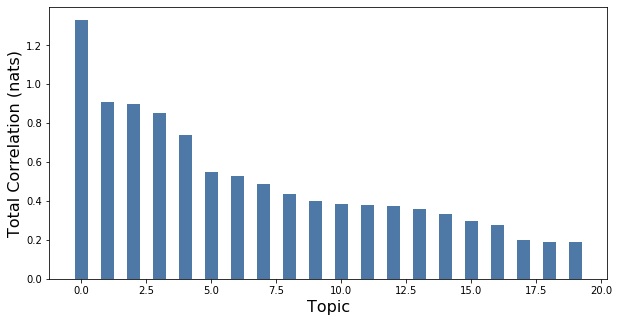

In [12]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

上图说明本实验主题数可选择在5~10

In [14]:
#可视化
from corextopic import vis_topic as vt
vt.vis_rep(topic_model, column_label=words, prefix='topic-model-example')

Print topics in text file


### Hierarchical Topic Models
The **`labels`** attribute gives the binary topic expressions for each document and each topic. We can use this output as input to another CorEx topic model to get latent representations of the topics themselves. This yields a hierarchical CorEx topic model. Like the first layer of the topic model, one can determine the number of latent variables to add in higher layers through examination of the topic TCs.

**`labels`**属性为每个文档和每个主题提供二进制主题表达式。 我们可以将此输出用作另一个CorEx主题模型的输入，以获取主题本身的潜在表示。 这将产生一个分层的CorEx主题模型。 像主题模型的第一层一样，可以通过检查主题TC来确定要添加到更高层中的潜在变量的数量。

In [17]:
# Train a second layer to the topic model
tm_layer2 = ct.Corex(n_hidden=10)
tm_layer2.fit(topic_model.labels);

# Train a third layer to the topic model
tm_layer3 = ct.Corex(n_hidden=1)
tm_layer3.fit(tm_layer2.labels);

If you have `graphviz` installed, then you can output visualizations of the hierarchial topic model to your current working directory. One can also create custom visualizations of the hierarchy by properly making use of the **`labels`** attribute of each layer.

如果安装了**` graphviz`**，则可以将层次结构主题模型的可视化输出到当前工作目录。 通过适当利用每一层的**`labels`**属性，还可以创建层次结构的自定义可视化效果。

In [19]:
vt.vis_hierarchy([topic_model, tm_layer2, tm_layer3], column_label=words, max_edges=200, prefix='topic-model-example')

weight threshold is 0.000000 for graph with max of 200.000000 edges 
non-isolated nodes,edges 27 27
non-isolated nodes,edges 27 26
Couldn't find 'force.html' file for visualizing d3 output


### Anchoring for Semi-Supervised Topic Modeling  锚定词使用（带有先验知识）

Anchored CorEx is an extension of CorEx that allows the "anchoring" of words to topics. When anchoring a word to a topic, CorEx is trying to maximize the mutual information between that word and the anchored topic. So, anchoring provides a way to guide the topic model towards specific subsets of words that the user would like to explore.  

The anchoring mechanism is flexible, and so there are many possibilities of anchoring. We explored the following types of anchoring in our TACL paper:

1. Anchoring a single set of words to a single topic. This can help promote a topic that did not naturally emerge when running an unsupervised instance of the CorEx topic model. For example, one might anchor words like "snow," "cold," and "avalanche" to a topic if one suspects there should be a snow avalanche topic within a set of disaster relief articles.

2. Anchoring single sets of words to multiple topics. This can help find different aspects of a topic that may be discussed in several different contexts. For example, one might anchor "protest" to three topics and "riot" to three other topics to understand different framings that arise from tweets about political protests.

3. Anchoring different sets of words to multiple topics. This can help enforce topic separability if there appear to be chimera topics. For example, one might anchor "mountain," "Bernese," and "dog" to one topic and "mountain," "rocky," and "colorado" to another topic to help separate topics that merge discussion of Bernese Mountain Dogs and the Rocky Mountains.


We'll demonstrate how to anchor words to the the CorEx topic model and how to develop other anchoring strategies.

In [15]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [17]:
corpus = []
for line in open(data_1, 'r',encoding='utf-8').readlines():
        #print line
    corpus.append(line.strip())
    #print corpus

    #将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(max_features=20000,binary=True)
X = vectorizer.fit_transform(corpus)
#X.toarray()
X = ss.csr_matrix(X)   
print(X.shape)

(16722, 17812)


In [18]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))
#print (words)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 锚定词探究特定主题

In [19]:
# Anchor one word to the first topic
anchor_words= [['希望'],
               ['希望'],
               ['希望'],
               ['想要'],
               ['想要'],
               ['想要']
               ]

In [20]:
# Anchor the word 'nasa' to the first topic
anchored_topic_model = ct.Corex(n_hidden=12, max_iter=200,verbose=0, seed=2)
anchored_topic_model.fit(X, words=words, anchors=anchor_words, anchor_strength=6)

In [21]:
topic_words,_ = zip(*anchored_topic_model.get_topics(topic=0, n_words=20))
print('0: ' + ','.join(topic_words))

0: 希望,园区,主题,酒店,玩具,雨衣,总动员,进入,免费,商店,准备,米妮,开园,发现,提供,小伙伴,唐鸭,地点,开放,具体


In [22]:
for n in range(len(anchor_words)):
    topic_words,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ','.join(topic_words))

0: 希望,园区,主题,酒店,玩具,雨衣,总动员,进入,免费,商店
1: 希望,大家,选择,餐厅,领取,结束,区域,观看,根据,休息
2: 希望,旋转,城堡,木马,小飞侠,冰雪,爱丽丝,小熊维尼,世界,大街
3: 适合,喜欢,小朋友,有点,朋友,景色,有趣,超赞,小孩,超级
4: 身份证,入园,门票,携程,直接,购买,官方,客服,维码,买票
5: 工作人员,里面,安检,东西,服务,食物,门口,态度,检查,人员


In [23]:
#整体效果
topics = anchored_topic_model.get_topics(n_words=20)

for topic_n, topic in enumerate(topics):
    words, mis = zip(*topic)
    topic_str = str(topic_n)+'：'+','.join(words)
    print(topic_str)

0：希望,园区,主题,酒店,玩具,雨衣,总动员,进入,免费,商店,准备,米妮,开园,发现,提供,小伙伴,唐鸭,地点,开放,具体
1：希望,大家,选择,餐厅,领取,结束,区域,观看,根据,休息,地图,安排,情况,注意,全部,现场,出现,有人,进行,行程
2：希望,旋转,城堡,木马,小飞侠,冰雪,爱丽丝,小熊维尼,世界,大街,天空,童话,仙境,梦游,明日,险记,梦幻,背包,探险,营救
3：适合,喜欢,小朋友,有点,朋友,景色,有趣,超赞,小孩,超级,小孩子,开心,夏天,看看,氛围,身高,总体,性价比,两天,闺蜜
4：身份证,入园,门票,携程,直接,购买,官方,客服,维码,买票,结果,享卡,优惠,购票,订票,尊享,关联,取票,电话,导游
5：工作人员,里面,安检,东西,服务,食物,门口,态度,检查,人员,套餐,吃饭,价格,外面,饮料,热情,食品,景区,矿泉水,直饮水
6：排队,项目,小时,时间,分钟,热门,提前,建议,左右,早上,通行证,时候,开始,游玩,进园,以上,预约,速通道,体验,十分钟
7：童年,孩子,感受,地方,知道,大人,梦想,童话世界,回忆,完全,美食,动画片,宝宝,卡通人物,条款,霸王,瞬间,建筑,仿佛,环球
8：晚上,烟花,表演,花车,巡游,烟火,位置,演出,精彩,感觉,人物,遗憾,巡演,漂亮,视觉,剧场,夜晚,两场,万圣节,电影
9：地平线,飞跃,小矮人,漂流,加勒比海,雷鸣,矿山,刺激,宝藏,沉落,翱翔,山车,矿车,海盗船,抱抱,效果,震撼,推荐,赛车,加勒比
10：迪士尼,上海,乐园,度假区,游客,香港,全球,长大,中国,全世界,游乐,主题乐园,特色,卡通,圣诞,东京,元素,浪漫,美丽,形象
11：地铁,小镇,交通,停车场,接送,出发,味道,鸡腿,手机,网上,民宿,天气,停车,衣服,不少,晚餐,开车,住宿,拍拍,舒服


In [24]:
# Overrall TC
anchored_topic_model.tc

10.205117313104056

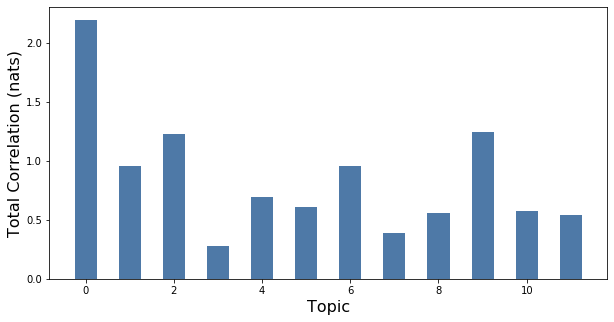

In [25]:
plt.figure(figsize=(10,5))
plt.bar(range(anchored_topic_model.tcs.shape[0]), anchored_topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [26]:
anchored_topic_model.tcs

array([2.19118364, 0.95419994, 1.22962494, 0.27487286, 0.68896971,
       0.60672487, 0.95407575, 0.3897401 , 0.55433792, 1.2451764 ,
       0.57323894, 0.54297226])